# Q&A Activity on Testing of Hypothesis

### Submitted by: *Fen Francis Pereira, Jayaram K, Ashmina T.*

**Objective:** To analyze the dataset containing marks of some students and answer the following:  
1. Carry out descriptive analytics on the dataset.
2. Check whether female and male students scored the same marks.
3. Whether test preparation helps the students?

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
#loading the dataset
data = pd.read_csv('marks.csv')

In [3]:
#displaying first 5 rows in the dataset
data.head()

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21


### 1. Carry out descriptive analytics on the dataset.

In [4]:
#checking for null values
data.isna().sum()

Gender              0
Test preparation    0
Total Marks         0
dtype: int64

No null values present, we can use the data for calculations.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            28 non-null     object
 1   Test preparation  28 non-null     object
 2   Total Marks       28 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 800.0+ bytes


In [6]:
data.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


Since mean value is closer to median value, the data distribution is normal.

<AxesSubplot:xlabel='Test preparation', ylabel='count'>

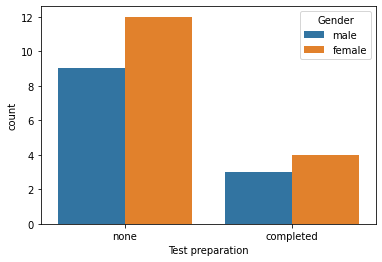

In [7]:
#countplot
sns.countplot(x='Test preparation',data=data,hue='Gender')

### 2. Check whether female and male students scored the same marks.

#### 2.a. Develop Hypothesis: 

**Null hypothesis, H<sub>0</sub>:** Avgrage marks scored by Female and Male are same  
**alternative hypothesis, H<sub>a</sub>:** Avgrage marks scored by Female and Male are different(or not equal)  

#### 2.b.Set significance level

In [8]:
#setting level of significance(alpha) to 0.05
alpha = 0.05

#### 2.c. Identify Test Statistic

In [9]:
data.shape[0]

28

Here sample size is less than 30. So, we are going to use t-statistic.

In [10]:
#splitting Total Marks column based on gender
male = data.loc[data['Gender']=='male']
female = data.loc[data['Gender']=='female']
a = female["Total Marks"]
b= male["Total Marks"]

#### 2.d. Determine p-value

In [11]:
t_score,p_value = ttest_ind(a,b)
print("t-score:%.3f, p-value:%.3f"%(t_score,p_value))

t-score:0.694, p-value:0.494


#### 2.e. Comparing p-value and Significance level

In [12]:
if p_value < alpha:
  print("We reject null hypothesis i.e. Female and Male students not scoring the same marks")
else:
  print("We accept null hypothesis i.e. Female and Male students scored the same marks")

We accept null hypothesis i.e. Female and Male students scored the same marks


There is no significant difference in the marks scored by male and female students

### 3. Whether test preparation helps the students?

#### 3.a. Develop Hypothesis

**Null hypothesis, H<sub>0</sub>:** Average Marks obtained by students who completed Test preparation is greater than or equal to the average marks obtained by students who did not complete Test preparation.  
**Alternative hypothesis, H<sub>a</sub>:** Average Marks obtained by students who completed Test preparation is less than the average marks obtained by students who did not complete Test preparation

#### 3.b. Set Significance Level

In [13]:
# Setting Level of Significance(alpha) to 0.05
alpha = 0.05

#### 3.c. Identify Test Statistic

As the sample size is less than 30, we use t-statistics.

In [14]:
#splitting Total Marks column based on Test preparation completed or not
prep_yes = data.loc[data['Test preparation']=='completed']
prep_no = data.loc[data['Test preparation']=='none']
x = prep_yes['Total Marks']
y= prep_no['Total Marks']

#### 3.d. Determine p-value

In [15]:
t_score,p_value = ttest_ind(x,y,alternative='less')
print("t-score:%.3f, p-value:%.3f"%(t_score,p_value))

t-score:3.614, p-value:0.999


#### 3.e. Comparing p-value and Significance level

In [16]:
if p_value <0.05:
  print("We reject null hypothesis i.e. Test preparation had no effect on the Total Marks obtained.")
else:
  print("We accept null hypothesis i.e. Completing the Test preparation increased the average marks of the students")

We accept null hypothesis i.e. Completing the Test preparation increased the average marks of the students
